<a href="https://colab.research.google.com/github/shivrajsjadhav/EDA-Capstone-hotel-booking-data/blob/main/Shivraj's_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#uploading a csv file
hotel_booking = pd.read_csv("/content/drive/MyDrive/EDA Hotel booking/Copy of Hotel Bookings.csv")

In [4]:
#to see column names in a data
hotel_booking.head(10).T

,0,1,2,3,4,5,6,7,8,9
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel
is_canceled,0,0,0,0,0,0,0,0,1,1
lead_time,342,737,7,13,14,14,0,9,85,75
arrival_date_year,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015
arrival_date_month,July,July,July,July,July,July,July,July,July,July
arrival_date_week_number,27,27,27,27,27,27,27,27,27,27
arrival_date_day_of_month,1,1,1,1,1,1,1,1,1,1
stays_in_weekend_nights,0,0,0,0,0,0,0,0,0,0
stays_in_week_nights,0,0,1,1,2,2,2,2,3,3
adults,2,2,1,1,2,2,2,2,2,2


<b>hotel_Types - Resort Hotel and City Hotel <br>
is_canceled - tells us where booking was cancelled or not <br>
lead_time - the number of days between the time a guest books their room and the time they are scheduled to arrive at the hotel.<br>
arrival_date_year - gives year of arrival of a guest <br>
arrival_date_Month - gives year of arrival of a guest <br>
arrival_date_week_number - week no of arrival of a guest in given year <br>
arrival_date_day_of_month - day of arrival in a month <br>
stays_in_weekend_nights - Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel <br>
stays_in_week_nights - Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel <br>
adults - no of adults <br>
children - no of children <br>
babies - no of babies <br>
meal - Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal <br>
country -Country of origin <br>
market_segment -Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators” <br>
distributed_channel - Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators” <br>
is_repeated_guest -Value indicating if the booking name was from a repeated guest (1) or not (0) <br>
previous_cancellations -Number of previous bookings that were cancelled by the customer prior to the current booking <br>
previous_bookings_not_canceled - Number of previous bookings not cancelled by the customer prior to the current booking <br>
reserved_room_type -Code of room type reserved. Code is presented instead of designation for anonymity reasons. <br>
assigned_room_type -Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due <br>
booking_changes -Number of changes/amendments made to the booking from the moment the booking was entered on the PMS <br>
deposit_type - Indication on if the customer made a deposit to guarantee the booking. <br>
agent - ID of the travel agency that made the booking <br>
company -ID of the company/entity that made the booking or responsible for paying the booking. <br>
days_in_waiting_list - Number of days the booking was in the waiting list before it was confirmed to the customer <br>
customer_type -Type of booking, assuming one of four categories <br>
adr -Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights <br>
required_car_parking_spaces - Number of car parking spaces required by the customer <br>
total_of_special_requests - Number of special requests made by the customer <br>
reservation_status -Reservation last status <br>
reservation_status_date -Date at which the last status was set.

In [5]:
#let us find out length
len(hotel_booking)

119390

In [6]:
#let us find out no of rows and columns in a dataframe
hotel_booking.shape

(119390, 32)

In [7]:
#to find data type of each column
hotel_booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
#to find out if null values are present in a column of a dataset
hotel_booking.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [9]:
hotel_booking['children'].fillna(0,inplace=True)
hotel_booking['country'].fillna('XYZ',inplace=True)

In [10]:
hotel_booking.drop(['agent','company'],axis=1,inplace=True)

In [11]:
hotel_booking.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [12]:
hotel_booking.shape

(119390, 30)

In [13]:
import seaborn as sns

# 1.What are the Top 10 Countries of Origin of Hotel visitors (Guests)?

In [14]:
#What are the Top 10 Countries of Origin of Hotel visitors (Guests)?
top_ten_countries =hotel_booking['country'].value_counts().head(10)
print(top_ten_countries)

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
Name: country, dtype: int64


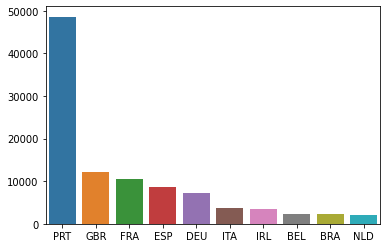

In [15]:
sns.barplot(y=list(hotel_booking.country.value_counts().head (10)),x= list(hotel_booking.country.value_counts().head(10).index))

 Portugal, Great Britain ,France, Spain and Germany are the top countries from where most guests come, more than 80% guests are from these 5 countries.

# 2.Which Month is the Most Occupied with Bookings at the Hotel?

In [16]:
#Which Month is the Most Occupied with Bookings at the Hotel?
hotel_booking['arrival_date_month'].value_counts(sort= False)

July         12661
August       13877
September    10508
October      11160
November      6794
December      6780
January       5929
February      8068
March         9794
April        11089
May          11791
June         10939
Name: arrival_date_month, dtype: int64

Text(0.5, 0, 'Month')

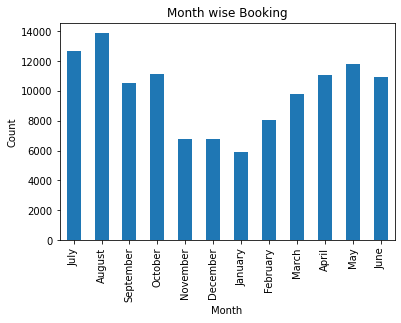

In [17]:

hotel_booking['arrival_date_month'].value_counts(sort=False).plot(kind='bar')

plt.title('Month wise Booking')
plt.ylabel('Count')
plt.xlabel('Month')

August,July,May,october and April are the most occupied months.

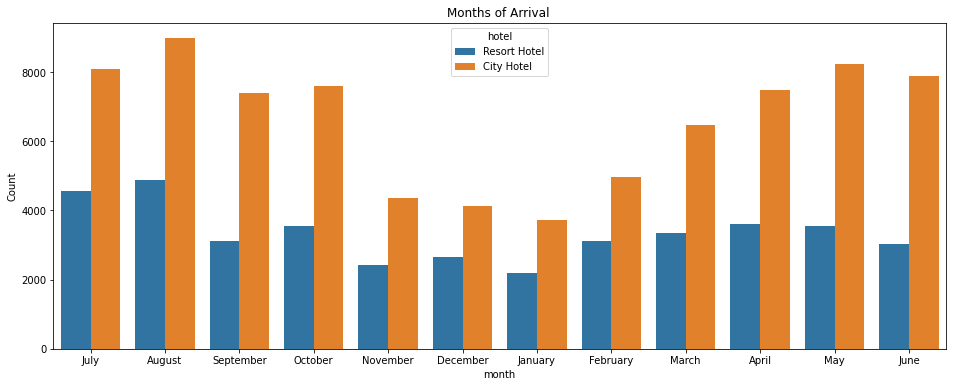

In [18]:
plt.figure(figsize=(16,6))
sns.countplot(x='arrival_date_month', hue = 'hotel', data= hotel_booking)

plt.title('Months of Arrival ')
plt.ylabel('Count')
plt.xlabel('month')
plt.show()

For both type of hotels, pattern seems to be same for Month of arrival

#3.How many Bookings were Cancelled at the Hotel?<b>

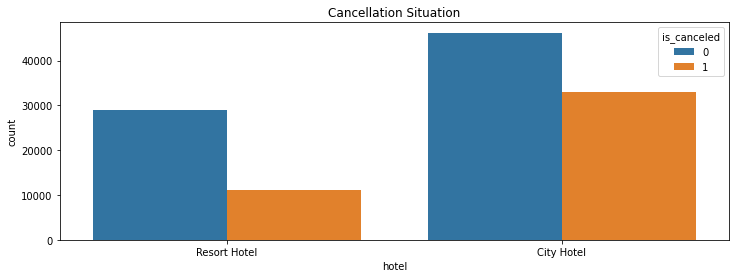

In [19]:
plt.figure(figsize=(12,4))
sns.countplot(x='hotel', hue = 'is_canceled', data= hotel_booking)
plt.title('Cancellation Situation')
plt.show()

Resort Hotel has lower percentage of cancellation as compared to City Hotel

#4.Relationship between Average Daily Rate(ADR) and Arrival Month by Booking Cancellation Status <b>

Text(0, 0.5, 'ADR')

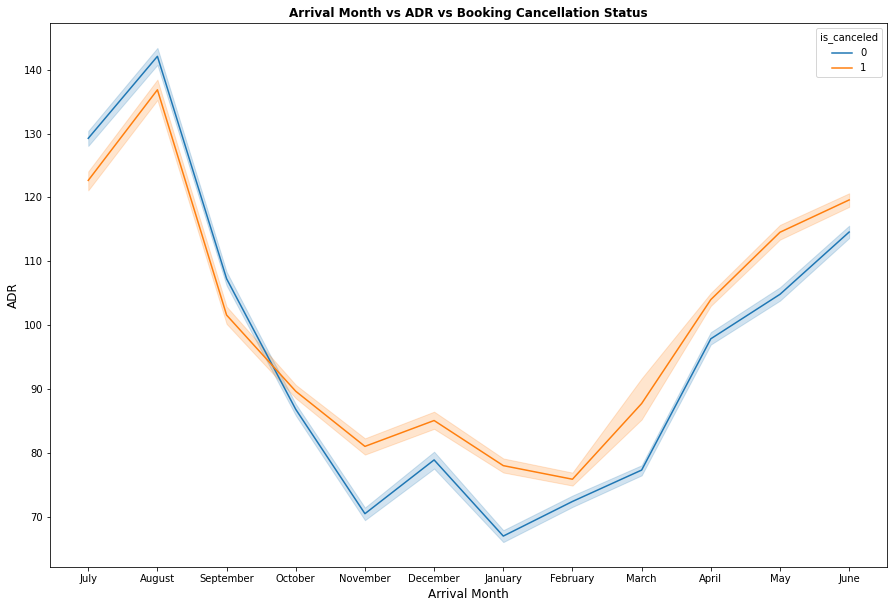

In [44]:
hotel_booking['adr'] = hotel_booking['adr'].astype(float)
plt.figure(figsize=(15,10))
sns.lineplot(x='arrival_date_month', y='adr', hue='is_canceled', data=hotel_booking)
plt.title('Arrival Month vs ADR vs Booking Cancellation Status', weight='bold')
plt.xlabel('Arrival Month', fontsize=12)
plt.ylabel('ADR', fontsize=12)

ADR has Positive Correlation with Total no. of bookings made by the guests

#5. Relationship between Lead time and arrival date year by booking cancellation status <b>

Text(0, 0.5, 'lead_time')

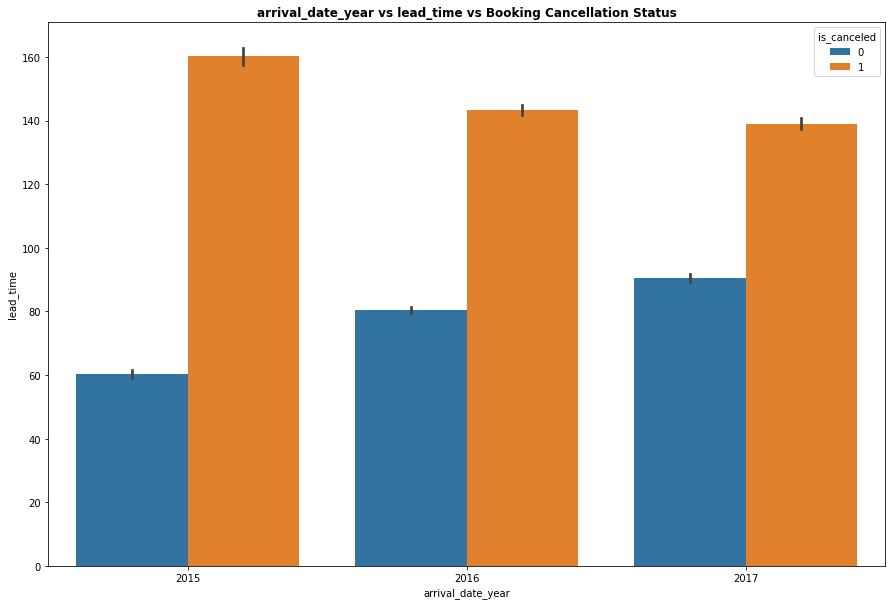

In [22]:
hotel_booking['lead_time'] = hotel_booking['lead_time'].astype(float)
plt.figure(figsize=(15,10))
sns.barplot(x='arrival_date_year', y='lead_time', hue='is_canceled', dodge=True, data=hotel_booking)
plt.title('arrival_date_year vs lead_time vs Booking Cancellation Status', weight='bold')
plt.xlabel('arrival_date_year', fontsize=10)
plt.ylabel('lead_time', fontsize=10)

Higher Lead Time affects directly to cancellation of bookings. 

#6. Effect of Deposit Type on cancellations <b>

In [23]:
hotel_booking.deposit_type.unique()
hotel_booking.deposit_type.value_counts()

No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

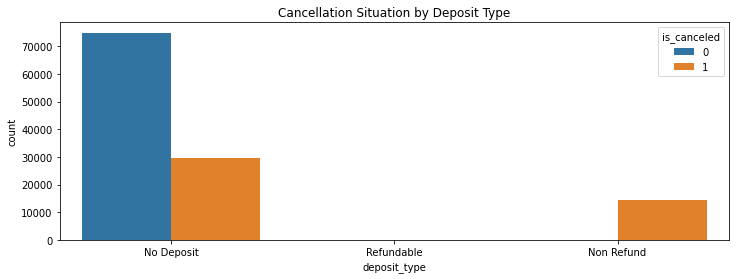

In [24]:
plt.figure(figsize=(12,4))
sns.countplot(x='deposit_type', hue = 'is_canceled', data= hotel_booking)
plt.title('Cancellation Situation by Deposit Type')
plt.show()

Most of the bookings with Deposit Type- Non-refund gets canceled

# 7.How Long People Stay in the hotel

In [25]:
hotel_booking['total_staying_nights'] = hotel_booking['stays_in_week_nights'] + hotel_booking['stays_in_weekend_nights']

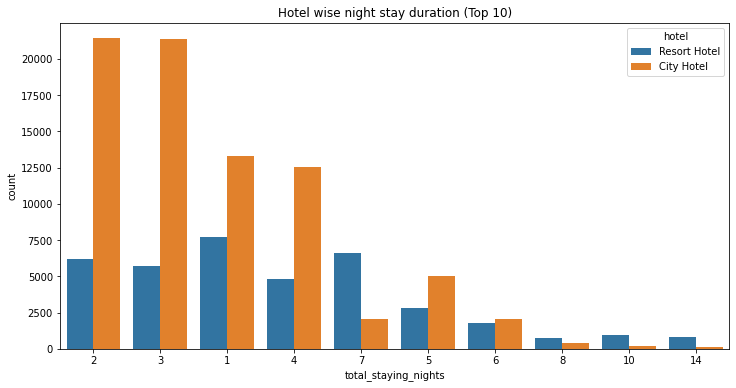

In [26]:
fig, ax = plt.subplots(figsize=(12,6))
ax.set_xlabel('No of Nights')
ax.set_ylabel('No of Nights')
ax.set_title('Hotel wise night stay duration (Top 10)')
sns.countplot(x='total_staying_nights', hue='hotel', data=hotel_booking,
              order = hotel_booking.total_staying_nights.value_counts().iloc[:10].index, ax=ax);

Most of the guests stay for 2-3 days followed by 1 and 4 days respectively for both the hotels

# 8.Percentage of Bookings canceled from Total no. of bookings

Text(0.5, 1.0, 'percentage of hotel bookings Canceled')

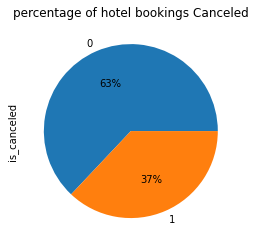

In [27]:
hotel_booking['is_canceled'].value_counts().plot(kind='pie',autopct='%1.0f%%')

plt.title('percentage of hotel bookings Canceled')


37% of the Total Bokkings made gets canceled

# 9.Total no of Bookings by Market Segment

Text(0.5, 1.0, 'Bookings by Market Segment ')

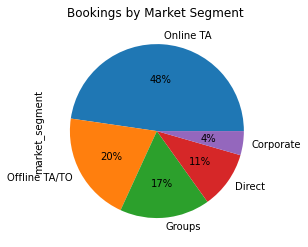

In [28]:
hotel_booking['market_segment'].value_counts().head().plot(kind='pie',autopct='%1.0f%%')

plt.title('Bookings by Market Segment ')

48% of the bookings were made through Online Travel Agents

# 10. Arrival per year

Text(0.5, 0, 'Year')

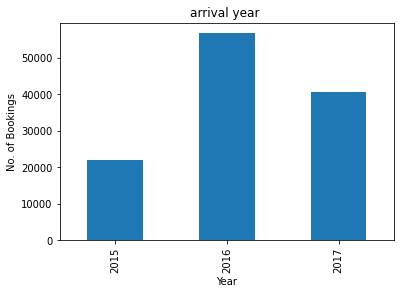

In [29]:

hotel_booking['arrival_date_year'].sort_index().value_counts(sort=False).plot(kind='bar')

plt.title('arrival year ')
plt.ylabel('No. of Bookings')
plt.xlabel('Year')

Bookings increased in 2016 as compared to 2015 but again declined in year 2017

# 11. Preferred Meal Type

In [30]:
hotel_booking.meal.unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [31]:
hb=hotel_booking['meal'].value_counts().head(10)
hb

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

Text(0.5, 1.0, 'Prefered Meal types')

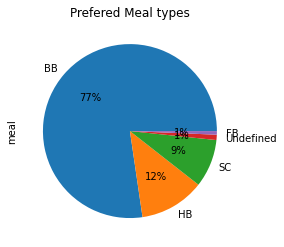

In [32]:
hotel_booking['meal'].value_counts().head(10).plot(kind='pie',autopct='%1.0f%%')

plt.title('Prefered Meal types')


77% of the Guests prefer BB type Meal

# 12. Parking space

Text(0.5, 1.0, 'required_car_parking_spaces ')

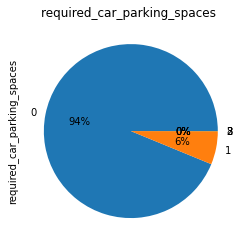

In [33]:
hotel_booking.required_car_parking_spaces.value_counts().plot(kind='pie',autopct='%1.0f%%')

plt.title('required_car_parking_spaces ')

94% of the guests do not require car parking spaces. Only 6% people do require it.

# 13.Most demanded Room Type

In [34]:
hotel_booking.reserved_room_type.unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], dtype=object)

In [35]:
room_demand = hotel_booking.reserved_room_type.value_counts()

Text(0.5, 0, 'room type')

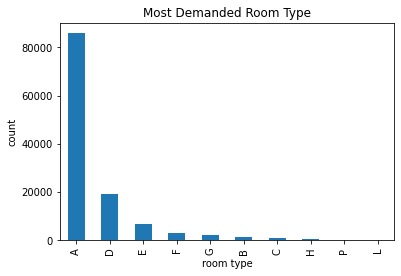

In [36]:
room_demand.plot(kind='bar')

plt.title('Most Demanded Room Type')
plt.ylabel('count')
plt.xlabel('room type')

Room Type A is Demanded by most of the guests followed by D and E respectively

 # 14. Which hotel has a  high chance that its customer will return for another stay?

Text(0.5, 1.0, 'is_repeated_guest ')

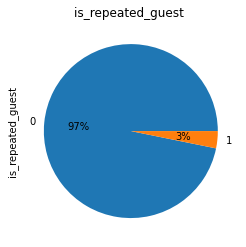

In [37]:
hotel_booking['is_repeated_guest'].value_counts().plot(kind='pie',autopct='%1.0f%%')

plt.title('is_repeated_guest ')

Only 3% of total guests were the repeated guests

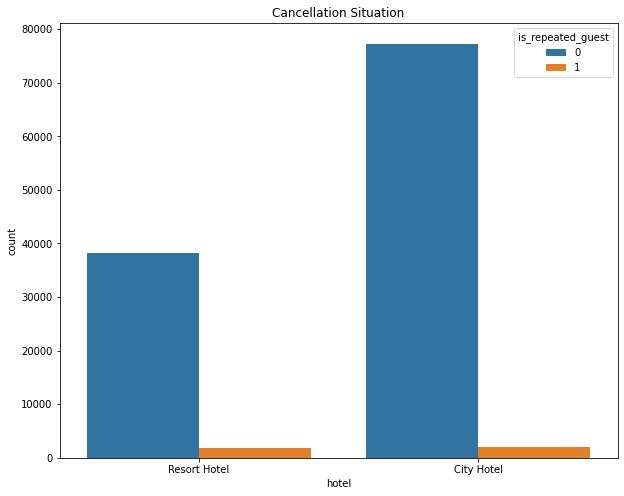

In [38]:
plt.figure(figsize=(10,8))
sns.countplot(x='hotel',hue='is_repeated_guest', data= hotel_booking)
plt.title('Cancellation Situation')
plt.show()

Resort Hotel has a higher chace that its customer will return for another stay as compared to city hotel

# 15. Special request

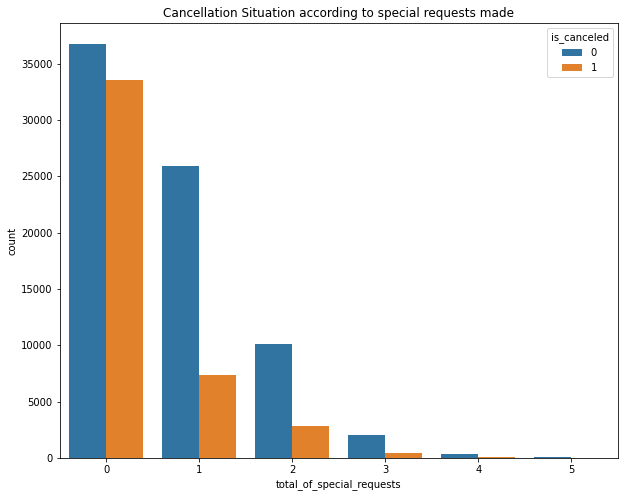

In [39]:
plt.figure(figsize=(10,8))
sns.countplot(x='total_of_special_requests',hue='is_canceled', data= hotel_booking)
plt.title('Cancellation Situation according to special requests made')
plt.show()

Booking Cancellation percentage is lower when special reuest is made by a customer.

# 16. Hotel Preference By Customer Type

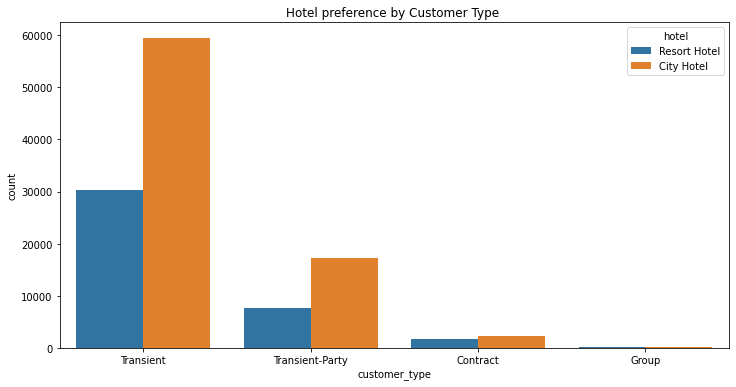

In [40]:
fig, ax = plt.subplots(figsize=(12,6))
ax.set_xlabel('No of Nights')
ax.set_ylabel('No of Nights')
ax.set_title('Hotel preference by Customer Type ')
sns.countplot(x='customer_type', hue='hotel', data=hotel_booking,
              order = hotel_booking.customer_type.value_counts().iloc[:10].index, ax=ax);

City Hotel is preferred hotel for all the customer types

# 17. Hotel Booking by distribution Channel

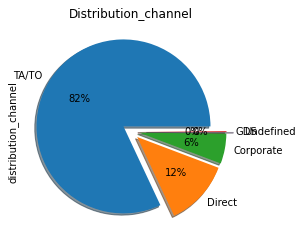

In [41]:
hotel_booking['distribution_channel'].value_counts().head().plot(kind='pie',autopct='%1.0f%%',shadow=True,explode=[0.1,0.1,0.1,0.1,0.2])
plt.title("Distribution_channel")
plt.show()

82% of the Bookings come from TA/TO Channel